### Import bibliotek

In [54]:
import os
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Wczytanie i przygotowanie danych

In [55]:
# Wyświetlenie listy kodów produktów z pobranymi opiniami
dir__list = os.listdir('./opinions')

ids__list = [name.removesuffix('.json') for name in dir__list]
print(*ids__list, sep=', ')


147751861, 84514582, 96964384


In [ ]:
# Wczytanie danych z pliku .json do obkiektu przypominającego tabelę
id = input("Podaj kod produktu:")
reviews = pd.read_json(f'./opinions/{id}.json').set_index('review_id')



In [57]:
reviews.score = reviews.score.apply(lambda s: s.split('/')[0].replace(',','.')).astype(float)
reviews.likes = reviews.likes.astype(int)
reviews.dislikes = reviews.dislikes.astype(int)

### Podstawowe Statystyki

In [58]:
reviews_count = len(reviews.index)
pros_count = reviews.pros.astype(bool).sum()
cons_count =  reviews.cons.astype(bool).sum()
pros_cons_count = reviews.apply(lambda r: bool(r.pros) and bool(r.cons), axis=1).sum()
average_score = round(reviews.score.mean(), 2)

pros = reviews.pros.explode().value_counts()
cons = reviews.cons.explode().value_counts()

print(f'liczba opinii o produkcie: {reviews_count}')
print(f'liczba opinii o przy których podana została lista zalet: {pros_count}')
print(f'liczba opinii o przy których podana została lista wad: {cons_count}')
print(f'liczba opinii o przy których podana została lista wad i zalet: {pros_cons_count}')
print(f'średnia ocena produktu: {average_score}')

liczba opinii o produkcie: 500
liczba opinii o przy których podana została lista zalet: 324
liczba opinii o przy których podana została lista wad: 116
liczba opinii o przy których podana została lista wad i zalet: 114
średnia ocena produktu: 4.76


### Wykresy

recomendation
Nie polecam     12
Polecam        480
None             8
Name: count, dtype: int64


<Axes: >

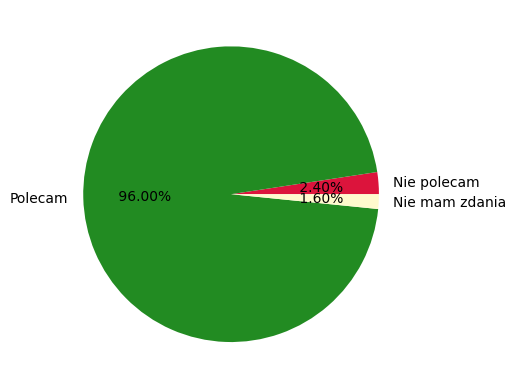

In [63]:
recomendation = (
    reviews.recomendation.explode()
    .value_counts(dropna=False)
    .reindex(["Nie polecam", "Polecam", None], fill_value=0)
)
print(recomendation)
recomendation.plot.pie(
    label="",
    labels=["Nie polecam", "Polecam", "Nie mam zdania"],
    colors=["crimson", "forestgreen", "lemonchiffon"],
    autopct= lambda x: f"{x: 1.2f}%" if x > 0 else ''
)